## Exploring the Eye Tracking Data from the POET data set (for one image) and create the dataset

In [35]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

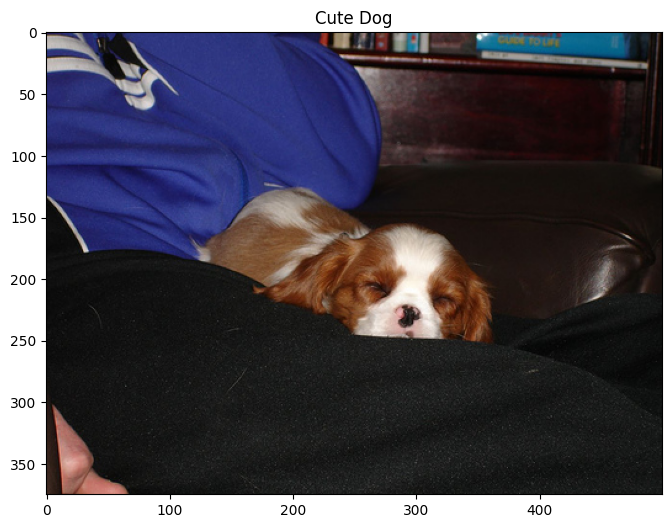

dict_keys(['__header__', '__version__', '__globals__', 'etData'])


In [36]:
# Load image
image_path = '/kaggle/input/images/dog_2008_001921.jpg'

img = mpimg.imread(image_path)

# Plot the image
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(img)
plt.title('Cute Dog') 
plt.show()

# Load the .mat file
mat_data = scipy.io.loadmat('../input/dog-test-et/etData_dog.mat') # This is the eye tracking data for one class (dog), so for all 1257 images classified as dogs

print(mat_data.keys()) # keys of matlab data

In [37]:
print(f"etData: {type(mat_data['etData'])}, Shape: {mat_data['etData'].shape}") # Shape = [number of images for dog, eye tracking data for each image as a nested void array]

etData: <class 'numpy.ndarray'>, Shape: (1257, 1)


In [38]:
print(mat_data["etData"][0]) # eye tracking data for the first image as a nested array
print()
first_entry = mat_data["etData"][0][0] # first image 
print(f"Type of first image: {type(first_entry)}") # data for each image is a numpy.void = Represents a structured array, allowing mixed types within a single array.

[(array(['2008_001921'], dtype='<U11'), array([[375, 500,   3]], dtype=uint16), array([[115, 125, 363, 254]], dtype=uint16), array([[0.63364755, 0.74047264, 1.21070723, 0.80606817, 0.95798266]]), array([[1, 1, 1, 1, 1]], dtype=uint8), array([[1]], dtype=uint8), array([[ 658,  269, 1158,  644]], dtype=uint16), array([[(array([[(array([[(array([[  7, 202],
                                [230, 466],
                                [481, 873]], dtype=uint16), array([[876. , 548.7],
                                [940.2, 493.4],
                                [923.4, 488.3]]))                                 ]],
                       dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                                [ nan,  nan],
                                [ nan,  nan]]), array([[859.9, 534.8],
                                [  nan,   nan],
                                [  nan,   nan]]))                     ]],
                       dtype=[('time', 'O'), ('pos',

#### Data description:

For every object class we have a matlab file containing the eyetracking data. Each file contains data for several images. For every image, the following information is provided:

- filename: The filename of an image.
- dimensions:  a 1x2 double array with image dimensions, [height width]
- gtbb:  a 1x2 double array with image dimensions, [height width]
- rt: an 1x5 double array with the response times in seconds of the 5 different viewers
- response: a 1x5 logical array with the correct button presses
- imScalingFactor: the scaling factor used to diplay the image in the monitor
- displayOffeset: the coordinates of the window where the image was diplayed in the monitor with resolution 1680x1050
- fixations: the fixation points of the 5 viewers for every eye, as well as information about duration

In [39]:
print("Field names in first entry:", first_entry.dtype.names) # Check the fields in the first entry
print()
print(f"Filename: {first_entry['filename']}") 
print(f"Dimensions: {first_entry['dimensions']}")
print(f"gtbb: {first_entry['gtbb']}") 
print(f"rt: {first_entry['rt']}")  
print(f"response: {first_entry['response'][0]}") 
print(f"imScalingFactor: {first_entry['imScalingFactor'][0]}") 
print(f"displayOffset: {first_entry['displayOffset'][0]}")

Field names in first entry: ('filename', 'dimensions', 'gtbb', 'rt', 'response', 'imScalingFactor', 'displayOffset', 'fixations')

Filename: ['2008_001921']
Dimensions: [[375 500   3]]
gtbb: [[115 125 363 254]]
rt: [[0.63364755 0.74047264 1.21070723 0.80606817 0.95798266]]
response: [1 1 1 1 1]
imScalingFactor: [1]
displayOffset: [ 658  269 1158  644]


### fixations - a 1x5 structure array with all information about the eye tracking data of 5 viewers

We are interested in the fixation points fo all viewers for each image. For one image, fixations is a 1x5 array (stores data for 5 viewers).
The structure is as follows: For every viewer, we have:

- screen coordinates of the eye tracking data (scrnCoord): Represents screen coordinates of the fixations. This field contains a 2D array with (x, y) values that map where a viewer's gaze is on the screen.
  
- image coordinates of the eye tracking data (imgCoord): Represents image coordinates of the fixations, translating screen coordinates onto specific image points.

    - fixR - fixations of the right eye
    - fixL - fixations of the left eye
 
            Each fixation (fixR and fixL) for both eyes includes two subfields:
      
          - time - an Mx2 array with the initial and final time of the M fixation in ms
          - pos - an Mx2 array with the x and y coordinates of the fixation positions.

So the structure/hierarchy for every viewer is as follows:

- scrnCoord:

    - fixR:
        - time
        - pos
    - FixL
        - time
        - pos
        
- imgCoord: 

  - fixR:
        - time
        - pos
    - FixL
        - time
        - pos

In [40]:
print(first_entry['fixations'])

[[(array([[(array([[(array([[  7, 202],
                         [230, 466],
                         [481, 873]], dtype=uint16), array([[876. , 548.7],
                         [940.2, 493.4],
                         [923.4, 488.3]]))                                 ]],
                dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                         [ nan,  nan],
                         [ nan,  nan]]), array([[859.9, 534.8],
                         [  nan,   nan],
                         [  nan,   nan]]))                     ]],
                dtype=[('time', 'O'), ('pos', 'O')]))                              ]],
        dtype=[('fixR', 'O'), ('fixL', 'O')]), array([[(array([[(array([[  7, 202],
                         [230, 466],
                         [481, 873]], dtype=uint16), array([[218. , 279.7],
                         [282.2, 224.4],
                         [265.4, 219.3]]))                                 ]],
                dtype=[('tim

In [41]:
print(len(first_entry['fixations'][0])) # 5 set of fixations (5 viewers)

print()

print("Fields for every viewer:", first_entry['fixations'].dtype.names) # fields for every viewer

print()

print(first_entry['fixations'][0][0]) # scrnCoord and imgCoord for the first viewer

print()

print("Fields for screen coordinates:", first_entry['fixations'][0][0][0].dtype.names) # fields for scrnCoord. Here we have information for each eye (RIGHT AND LEFT)

print()

print(first_entry['fixations'][0][0][0]['fixR']) # get time and pos for RIGHT eye

print()

print("Fields per eye", first_entry['fixations'][0][0][0]['fixR'][0][0].dtype.names) # fields for RIGHT eye (or generally for every eye)

print()

print(f"Fixation points for first image, first viewer, scrnCoord, right eye {first_entry['fixations'][0][0][0]['fixR'][0][0]['pos']}") # get the fixation points!

5

Fields for every viewer: ('scrnCoord', 'imgCoord')

(array([[(array([[(array([[  7, 202],
                       [230, 466],
                       [481, 873]], dtype=uint16), array([[876. , 548.7],
                       [940.2, 493.4],
                       [923.4, 488.3]]))                                 ]],
              dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                       [ nan,  nan],
                       [ nan,  nan]]), array([[859.9, 534.8],
                       [  nan,   nan],
                       [  nan,   nan]]))                     ]],
              dtype=[('time', 'O'), ('pos', 'O')]))                              ]],
      dtype=[('fixR', 'O'), ('fixL', 'O')]), array([[(array([[(array([[  7, 202],
                       [230, 466],
                       [481, 873]], dtype=uint16), array([[218. , 279.7],
                       [282.2, 224.4],
                       [265.4, 219.3]]))                                 ]],
     

In [42]:
# now get all fixation points for the first viewer (only image coordinates)!

fixation_points = []
fix_points_right = []
fix_points_left = []

fixation_points_screen = []
fix_points_right_screen = []
fix_points_left_screen = []

# Access the fixation data for the first viewer (image coordinates)
for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
    eye_data = first_entry['fixations'][0][0][1][eye]  # Access time and pos for the eye (1 because we want image coordinates, not screen coordindates)
    pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)
    #time_data = eye_data[0][0]['time'][0]  # Get the position data (fixation points for one eye)
    #print(time_data) # fixation points already ordered chronologically
    #print(eye, pos_data) 

    for fix_points in pos_data:
        for fix_point in fix_points:
            x, y = fix_point[0], fix_point[1]
            if not np.isnan(x) and not np.isnan(y):  # Exclude points with NaN
                fixation_points.append((x, y))
                if eye == 'fixR':
                    fix_points_right.append((x, y))
                elif eye == 'fixL':
                    fix_points_left.append((x, y))
                    

# Access the fixation data for the first viewer (screen coordinates)
for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
    eye_data = first_entry['fixations'][0][0][0][eye]  # Access time and pos for the eye 
    pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)
    #time_data = eye_data[0][0]['time'][0]  # Get the position data (fixation points for one eye)
    #print(time_data) # fixation points already ordered chronologically
    #print(eye, pos_data) 

    for fix_points in pos_data:
        for fix_point in fix_points:
            x, y = fix_point[0], fix_point[1]
            if not np.isnan(x) and not np.isnan(y):  # Exclude points with NaN
                fixation_points_screen.append((x, y))
                if eye == 'fixR':
                    fix_points_right_screen.append((x, y))
                elif eye == 'fixL':
                    fix_points_left_screen.append((x, y))
    

# Print the collected fixation points
print("Fixation Points for the First Viewer (Image Coordinates):")
print(fixation_points)
print("Fixation Points for the First Viewer and LEFT EYE (Image Coordinates):")
print(fix_points_left)
print("Fixation Points for the First Viewer and RIGHT EYE (Image Coordinates):")
print(fix_points_right)

print()


print("Fixation Points for the First Viewer (Screen Coordinates):")
print(fixation_points_screen)
print("Fixation Points for the First Viewer and LEFT EYE (Screen Coordinates):")
print(fix_points_left_screen)
print("Fixation Points for the First Viewer and RIGHT EYE (Screen Coordinates):")
print(fix_points_right_screen)

Fixation Points for the First Viewer (Image Coordinates):
[(218.0, 279.70000000000005), (282.20000000000005, 224.39999999999998), (265.4, 219.3), (201.89999999999998, 265.79999999999995)]
Fixation Points for the First Viewer and LEFT EYE (Image Coordinates):
[(201.89999999999998, 265.79999999999995)]
Fixation Points for the First Viewer and RIGHT EYE (Image Coordinates):
[(218.0, 279.70000000000005), (282.20000000000005, 224.39999999999998), (265.4, 219.3)]

Fixation Points for the First Viewer (Screen Coordinates):
[(876.0, 548.7), (940.2, 493.4), (923.4, 488.3), (859.9, 534.8)]
Fixation Points for the First Viewer and LEFT EYE (Screen Coordinates):
[(859.9, 534.8)]
Fixation Points for the First Viewer and RIGHT EYE (Screen Coordinates):
[(876.0, 548.7), (940.2, 493.4), (923.4, 488.3)]


### What kind of points and how many do we want to use as a prompt for SAM? Which are the most informative?

- Early points? 
- Points that are fixated the longest? 
- Average the fixations of the 5 viewers? Or just per viewer?

## Visualize fixations in the POET data set
### 1. For the first viewer (left and right points together), only image coordinates

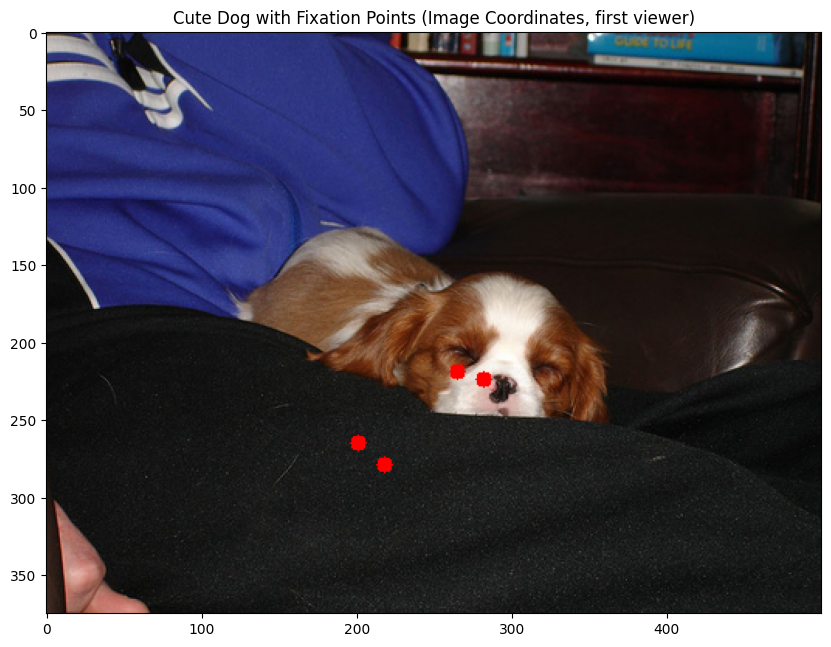

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_fixations_on_image(img, fixations):
    # Create a copy of the image to draw on
    img_with_fixations = img.copy()

    # Draw fixation points on the image
    for (x, y) in fixations:
        if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
            cv2.circle(img_with_fixations, (int(x), int(y)), 5, (255, 0, 0), -1) 

    return img_with_fixations

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot fixation points on the original image
img_with_fixations = plot_fixations_on_image(img, fixation_points)

# Display the image with fixation points
plt.figure(figsize=(10, 10))
plt.imshow(img_with_fixations)
plt.title('Cute Dog with Fixation Points (Image Coordinates, first viewer)')
plt.show()

### 2. The left and right eye movement for the first viewer

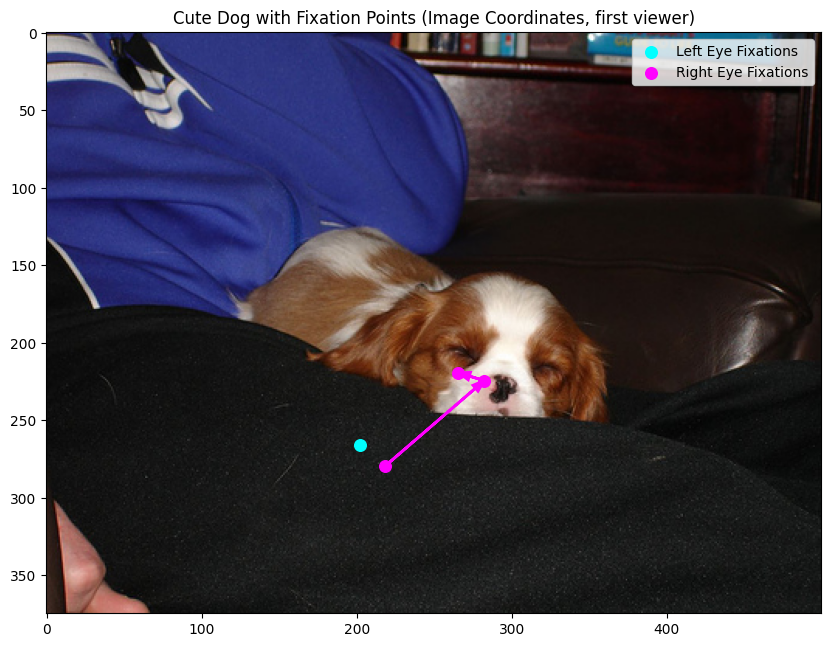

In [44]:
# For left and right eye

image_path = '/kaggle/input/images/dog_2008_001921.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image with fixation points
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Cute Dog with Fixation Points (Image Coordinates, first viewer)')

# Scatter plot for left and right eye points
plt.scatter(*zip(*fix_points_left), color='cyan', label='Left Eye Fixations', s=70)  # Add left eye points
plt.scatter(*zip(*fix_points_right), color='magenta', label='Right Eye Fixations', s=70)  # Add right eye points
plt.legend()

# Draw arrows between fixation points for left eye
for i in range(1, len(fix_points_left)):
    x_start, y_start = fix_points_left[i - 1]
    x_end, y_end = fix_points_left[i]
    plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
              color='cyan', shape='full', lw=2, 
              length_includes_head=True, head_width=5)

# Draw arrows between fixation points for right eye
for i in range(1, len(fix_points_right)):
    x_start, y_start = fix_points_right[i - 1]
    x_end, y_end = fix_points_right[i]
    plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
              color='magenta', shape='full', lw=2, 
              length_includes_head=True, head_width=5)

# Show the plot
plt.show()

### 3. The position of image, fixation cross, and fixation points in the screen setting

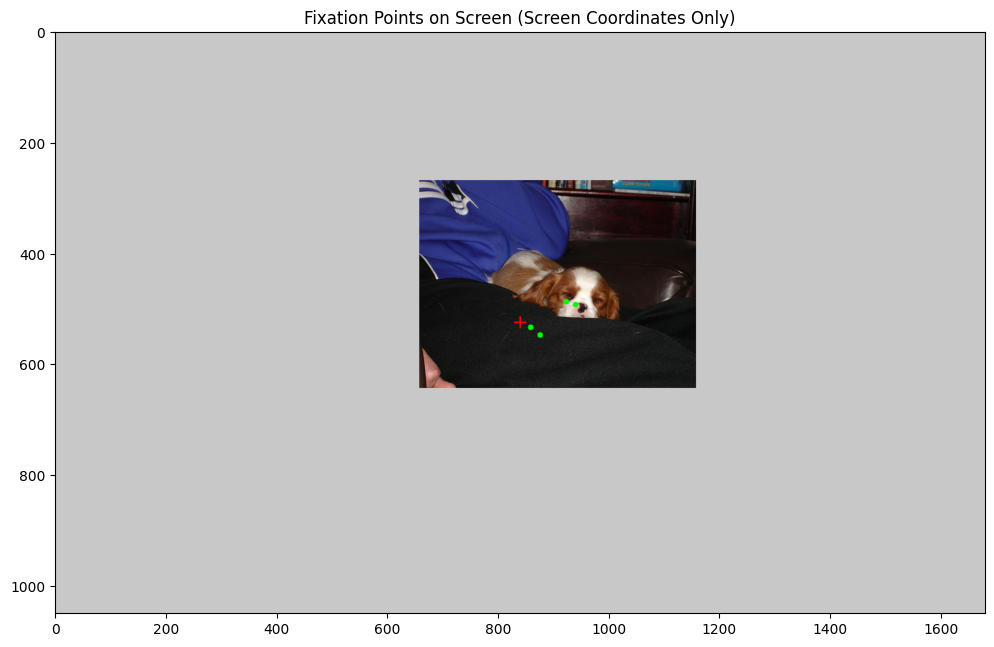

In [45]:
# plot the screen coordinates
offset = first_entry['displayOffset'][0] # the coordinates of the window where the image was diplayed in the monitor with resolution 1680x1050

# Screen size (set to the dimensions of your screen for accurate plotting)
screen_resolution = (1680,1050)

# Calculate the fixation cross position relative to the image
start_x, start_y = offset[0], offset[1]
center_x, center_y = screen_resolution[0] // 2, screen_resolution[1] // 2
fix_cross_x = center_x - start_x  # Relative X position
fix_cross_y = center_y - start_y  # Relative Y position

def plot_screen_fixations_on_extended_canvas(image, fixation_points_screen, screen_resolution, offset):
    # Create a gray background canvas for the full screen resolution
    canvas = np.full((screen_resolution[1], screen_resolution[0], 3), 200, dtype=np.uint8)  # Gray background

    # Get image dimensions
    img_height, img_width = image.shape[:2]
    start_x, start_y = offset[0], offset[1]

    # Place the image on the canvas based on the offset coordinates
    canvas[start_y:start_y + img_height, start_x:start_x + img_width] = image
    
    # Plot fixation points directly on the screen canvas
    for (x, y) in fixation_points_screen:
        # Draw each fixation point as a small green circle
        cv2.circle(canvas, (int(x), int(y)), 5, (0, 255, 0), -1)  # Green for screen fixations

    # Add a fixation cross at the center of the screen
    center_x, center_y = screen_resolution[0] // 2, screen_resolution[1] // 2
    cross_size = 10  # Length of cross arms in pixels
    cross_color = (255, 0, 0)  # Red color for the cross

    # Draw horizontal and vertical lines to form the cross
    cv2.line(canvas, (center_x - cross_size, center_y), (center_x + cross_size, center_y), cross_color, 2)
    cv2.line(canvas, (center_x, center_y - cross_size), (center_x, center_y + cross_size), cross_color, 2)

    return canvas

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the screen fixations on the extended canvas
canvas_with_screen_fixations = plot_screen_fixations_on_extended_canvas(image,fixation_points_screen, screen_resolution, offset)

plt.figure(figsize=(12, 8))
plt.imshow(canvas_with_screen_fixations)
plt.title('Fixation Points on Screen (Screen Coordinates Only)')
plt.show()

In [46]:

# Initialize lists to store fixation points for all viewers
fix_points_all_left = []
fix_points_all_right = []
fix_points_all_viewers = []

print(len(first_entry['fixations'][0])) # 5 set of fixations (5 viewers)
#print(first_entry['fixations'][0][0]) # first viewer
#print(first_entry['fixations'][0][1]) # second viewer

# Access fixation data for all viewers
for i in range(len(first_entry['fixations'][0])):
    for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
        eye_data = first_entry['fixations'][0][i][1][eye] # screen coordinates
        pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)

        # Collect fixation points while excluding NaN values
        for fix_points in pos_data:
            for fix_point in fix_points:
                x, y = fix_point[0], fix_point[1]
                if not np.isnan(x) and not np.isnan(y):  # Exclude points with NaN
                    fix_points_all_viewers.append((i+1, x, y))
                    if eye == 'fixR':
                        fix_points_all_right.append((i+1, x, y)) # store viewer, x, and y coordinates
                    elif eye == 'fixL':
                        fix_points_all_left.append((i+1, x, y))
                        
print("left", fix_points_all_left)
print("right", fix_points_all_right)

5
left [(1, 201.89999999999998, 265.79999999999995), (2, 191.29999999999995, 257.5), (2, 251.5, 223.89999999999998), (3, 141.20000000000005, 277.6), (3, 261.1, 231.2), (4, 197.79999999999995, 308.4), (4, 255.29999999999995, 257.6), (5, 176.10000000000002, 247.79999999999995), (5, 287.6, 215.7), (5, 311.79999999999995, 214.60000000000002), (5, 306.0, 221.7), (5, 308.9, 237.10000000000002)]
right [(1, 218.0, 279.70000000000005), (1, 282.20000000000005, 224.39999999999998), (1, 265.4, 219.3), (2, 216.39999999999998, 232.7), (2, 281.1, 218.7), (2, 304.79999999999995, 199.60000000000002), (3, 145.70000000000005, 240.2), (3, 273.29999999999995, 201.8), (4, 218.5, 262.5), (4, 287.5, 220.8), (5, 176.0, 244.0), (5, 286.6, 190.7), (5, 319.1, 215.10000000000002), (5, 302.79999999999995, 216.2), (5, 301.29999999999995, 215.8)]


### 4. Left and Right Fixation Points for all viewers (image coordinates)

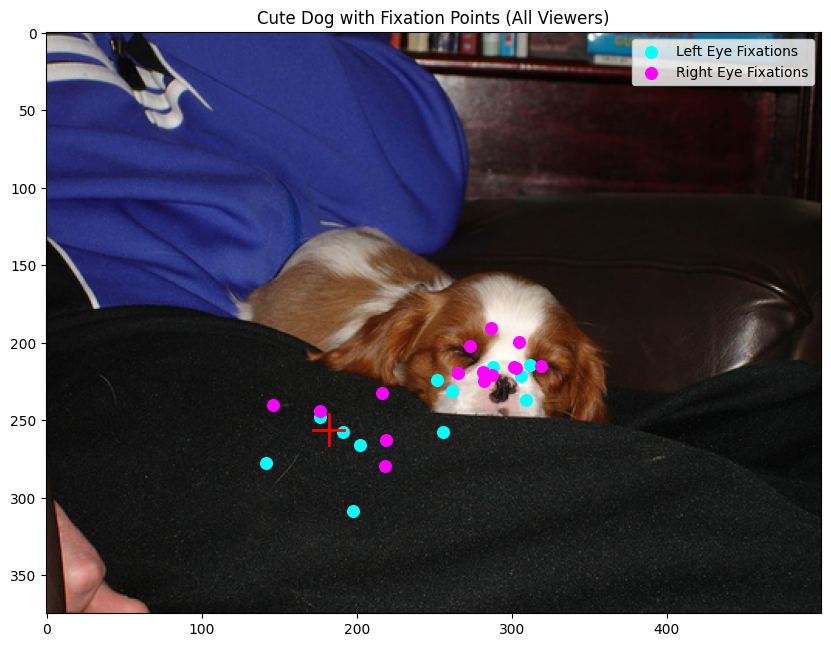

In [47]:
# Plot left and right fix points for all viewers
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Cute Dog with Fixation Points (All Viewers)')

# Draw the fixation cross at the calculated position
cross_size = 10  # Cross arm length in pixels
cross_color = (1, 0, 0)  # Red color for the cross
plt.plot([fix_cross_x - cross_size, fix_cross_x + cross_size], [fix_cross_y, fix_cross_y], color=cross_color, lw=2)
plt.plot([fix_cross_x, fix_cross_x], [fix_cross_y - cross_size, fix_cross_y + cross_size], color=cross_color, lw=2)

# Extract x, y coordinates for left and right eye fixation points
if fix_points_all_left:  # Check if there are any left eye points to plot
    left_x = [point[1] for point in fix_points_all_left]  # Extract x coordinates
    left_y = [point[2] for point in fix_points_all_left]  # Extract y coordinates
    plt.scatter(left_x, left_y, color='cyan', label='Left Eye Fixations', s=70)  # Add left eye points

if fix_points_all_right:  # Check if there are any right eye points to plot
    right_x = [point[1] for point in fix_points_all_right]  # Extract x coordinates
    right_y = [point[2] for point in fix_points_all_right]  # Extract y coordinates
    plt.scatter(right_x, right_y, color='magenta', label='Right Eye Fixations', s=70)  # Add right eye points

plt.legend()

# Show the plot
plt.show()

### 5. Eye movements for all viewers 

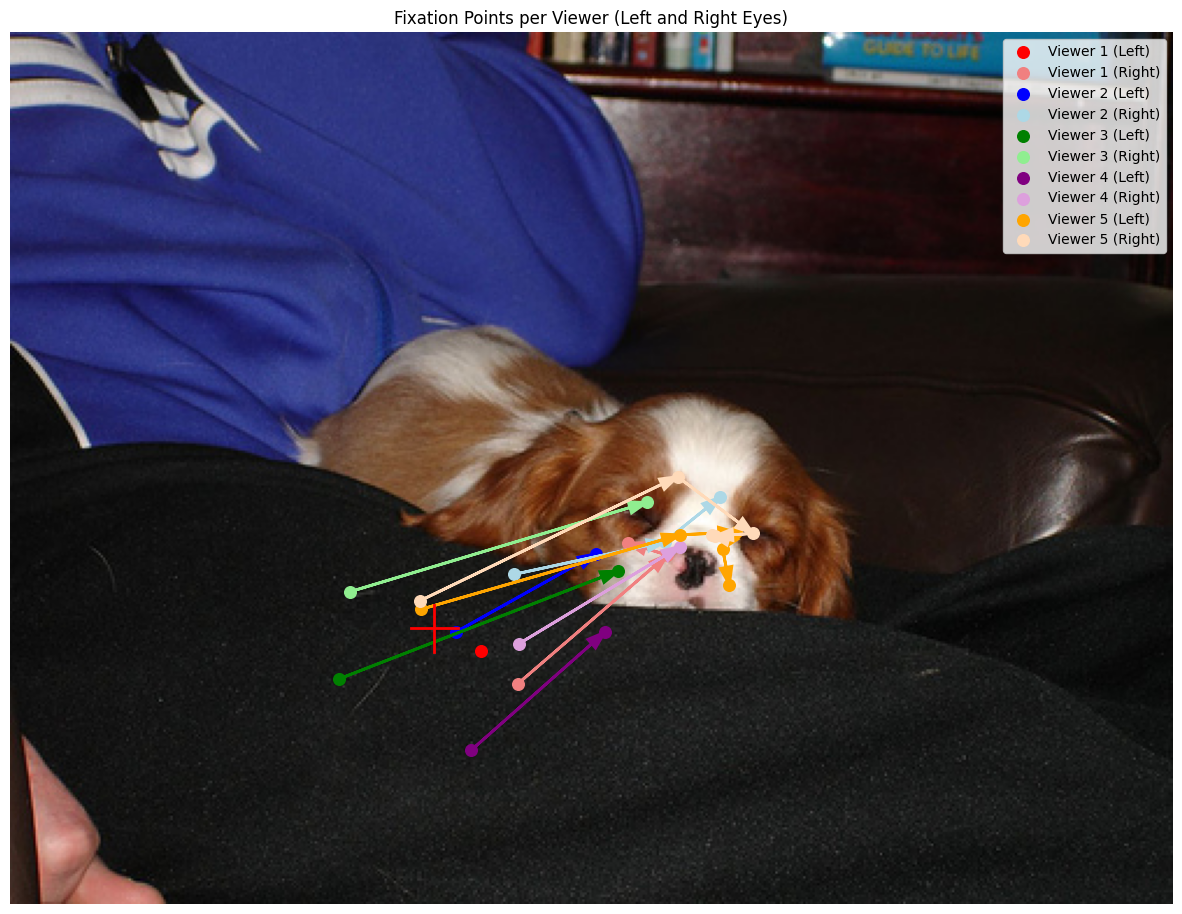

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each viewer: bold color for left, pastel for right
viewer_colors = [
    {'left': 'red', 'right': 'lightcoral'},
    {'left': 'blue', 'right': 'lightblue'},
    {'left': 'green', 'right': 'lightgreen'},
    {'left': 'purple', 'right': 'plum'},
    {'left': 'orange', 'right': 'peachpuff'}
]

# Plot fixation points for all viewers
plt.figure(figsize=(15, 15))
plt.imshow(img)  # Assuming `img` is the background image you want to display
plt.title('Fixation Points per Viewer (Left and Right Eyes)')

# Draw the fixation cross at the calculated position
cross_size = 10  # Cross arm length in pixels
cross_color = (1, 0, 0)  # Red color for the cross
plt.plot([fix_cross_x - cross_size, fix_cross_x + cross_size], [fix_cross_y, fix_cross_y], color=cross_color, lw=2)
plt.plot([fix_cross_x, fix_cross_x], [fix_cross_y - cross_size, fix_cross_y + cross_size], color=cross_color, lw=2)

# Plot fixation points for each viewer with distinct colors for each eye
for viewer_id in range(1, 6):  # Assuming 5 viewers based on your data
    # Get fixation points for the current viewer for left and right eyes
    viewer_left_points = [point for point in fix_points_all_left if point[0] == viewer_id]
    viewer_right_points = [point for point in fix_points_all_right if point[0] == viewer_id]

    # Plot left eye fixation points and draw arrows between points
    if viewer_left_points:
        x_left = [point[1] for point in viewer_left_points]
        y_left = [point[2] for point in viewer_left_points]
        plt.scatter(x_left, y_left, color=viewer_colors[viewer_id - 1]['left'], label=f'Viewer {viewer_id} (Left)', s=70)

        # Draw arrows between consecutive points for the left eye
        for i in range(1, len(viewer_left_points)):
            x_start, y_start = viewer_left_points[i - 1][1], viewer_left_points[i - 1][2]
            x_end, y_end = viewer_left_points[i][1], viewer_left_points[i][2]
            plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
                      color=viewer_colors[viewer_id - 1]['left'], lw=2, 
                      length_includes_head=True, head_width=5)

    # Plot right eye fixation points and draw arrows between points
    if viewer_right_points:
        x_right = [point[1] for point in viewer_right_points]
        y_right = [point[2] for point in viewer_right_points]
        plt.scatter(x_right, y_right, color=viewer_colors[viewer_id - 1]['right'], label=f'Viewer {viewer_id} (Right)', s=70)

        # Draw arrows between consecutive points for the right eye
        for i in range(1, len(viewer_right_points)):
            x_start, y_start = viewer_right_points[i - 1][1], viewer_right_points[i - 1][2]
            x_end, y_end = viewer_right_points[i][1], viewer_right_points[i][2]
            plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
                      color=viewer_colors[viewer_id - 1]['right'], lw=2, 
                      length_includes_head=True, head_width=5)

# Add legend, remove axes, and show the plot
plt.legend()
plt.axis('off')
plt.show()

We can observe that the first fixation point (for left and right eye) is in the position of the fixation cross and thus not very informative for the task of identifying the object. 

TO DO: check this for several other images!

### 6. Check eye movements (relative to fixation cross) for several images and all 5 viewers in 

### Create a Data Set for All Images and Viewers

In [64]:
import os
import scipy.io
import pandas as pd

def collect_eye_data(eye_data, eye):
    """Helper function to collect fixation points and durations."""
    coordinates = []
    start_end_times = []
    durations = []
    
    pos_data = eye_data[0][0]['pos'][0]
    time_data = eye_data[0][0]['time'][0]
    
    for fix_points in pos_data:
        coordinates.extend([(x, y) for x, y in fix_points])
        
    for time_points in time_data:
        for start, end in time_points:
            start_end_times.append((start, end))
            durations.append(abs(end - start))
    
    return coordinates, start_end_times, durations

def process_image_data(image, viewer_id, class_name):
    """Process data for a single image."""
    image_file = image['filename'][0][0]
    responses = image['response'][0][0]
    response = responses[viewer_id]
    
    image_coords_left, image_time_left, image_duration_left = [], [], []
    image_coords_right, image_time_right, image_duration_right = [], [], []
    screen_coords_left, screen_time_left, screen_duration_left = [], [], []
    screen_coords_right, screen_time_right, screen_duration_right = [], [], []

    # collecting image coordinates and timings for both eyes
    for eye in ['fixR', 'fixL']:
        eye_data = image['fixations'][0][0][viewer_id][1][eye]  # image coordinates
        coords, times, durations = collect_eye_data(eye_data, eye)
        
        if eye == 'fixR':
            image_coords_right, image_time_right, image_duration_right = coords, times, durations
        else:
            image_coords_left, image_time_left, image_duration_left = coords, times, durations
        
        eye_data_screen = image['fixations'][0][0][viewer_id][0][eye]  # screen coordinates
        screen_coords, screen_times, screen_durations = collect_eye_data(eye_data_screen, eye)
        
        if eye == 'fixR':
            screen_coords_right, screen_time_right, screen_duration_right = screen_coords, screen_times, screen_durations
        else:
            screen_coords_left, screen_time_left, screen_duration_left = screen_coords, screen_times, screen_durations

    return {
        "class": class_name,
        "image_file": image_file,
        "viewer": viewer_id + 1,
        "response": response,
        "image_coordinates_left": image_coords_left,
        "image_start_end_time_left": image_time_left,
        "image_duration_left": image_duration_left,
        "image_coordinates_right": image_coords_right,
        "image_start_end_time_right": image_time_right,
        "image_duration_right": image_duration_right,
        "screen_coordinates_left": screen_coords_left,
        "screen_coordinates_right": screen_coords_right
    }

def load_and_process_data(data_dir):
    """Load the .mat files and process the data."""
    data_rows = []
    
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".mat"):
            data = scipy.io.loadmat(os.path.join(data_dir, file_name))
            class_name = file_name.split("_")[1].split(".")[0] 
            
            # Loop through etData for each image
            for image in data['etData']:
                # Loop through viewers and process each viewer's data
                for viewer_id in range(len(image['fixations'][0][0])):
                    data_row = process_image_data(image, viewer_id, class_name)
                    data_rows.append(data_row)
    
    return pd.DataFrame(data_rows)

# Load and process the data
data_dir = "/kaggle/input/poet-etdata"
df = load_and_process_data(data_dir)
df.head(5)

class   image_file  viewer  response  \
0  diningtable  2010_001366       1         1   
1  diningtable  2010_001366       2         1   
2  diningtable  2010_001366       3         1   
3  diningtable  2010_001366       4         1   
4  diningtable  2010_001366       5         1   

                                                                                                                                                                                                  image_coordinates_left  \
0  [(111.79999999999995, 256.79999999999995), (314.79999999999995, 224.8), (246.29999999999995, 167.7), (243.89999999999998, 196.39999999999998), (195.10000000000002, 226.5), (239.70000000000005, 223.60000000000002)]   
1                                                             [(nan, nan), (318.70000000000005, 253.10000000000002), (262.1, 235.10000000000002), (332.79999999999995, 228.7), (250.39999999999998, 209.60000000000002)]   
2                                [(163.20000000000005, 238.60000000000002), (143.89999999999998, 238.10000000000002), (225.79999999999995, 156.10000000000002), (228.10000000000002, 196.7), (83.5, 184.89999999999998)]   
3                                                                                                                   [(228.29999999999995, 272.0), (234.20000000000005, 203.60000000000002), (228.70000000000005, 248.0)]   
4                                                                         [(139.29999999999995, 211.7), (218.10000000000002, 127.60000000000002), (222.29999999999995, 197.0), (221.89999999999998, 225.10000000000002)]   

                                                             image_start_end_time_left  \
0           [(7, 149), (186, 331), (359, 603), (618, 991), (1013, 1527), (1544, 1980)]   
1  [(nan, nan), (802.0, 1165.0), (1197.0, 1654.0), (1686.0, 1977.0), (2014.0, 2275.0)]   
2                         [(7, 105), (123, 265), (301, 582), (605, 993), (1033, 1263)]   
3                                                 [(16, 281), (317, 568), (589, 1115)]   
4                                     [(7, 227), (268, 441), (464, 894), (1016, 1741)]   

                 image_duration_left  \
0     [142, 145, 244, 373, 514, 436]   
1  [nan, 363.0, 457.0, 291.0, 261.0]   
2           [98, 142, 281, 388, 230]   
3                    [265, 251, 526]   
4               [220, 173, 430, 725]   

                                                                                                                                                                                                              image_coordinates_right  \
0  [(100.79999999999995, 260.1), (304.70000000000005, 229.2), (232.89999999999998, 167.39999999999998), (230.79999999999995, 204.89999999999998), (198.60000000000002, 237.70000000000005), (244.70000000000005, 226.60000000000002)]   
1                                             [(213.79999999999995, 194.39999999999998), (310.0999999999999, 246.20000000000005), (253.70000000000005, 228.10000000000002), (322.20000000000005, 230.3), (253.10000000000002, 209.7)]   
2                                                          [(170.5, 233.70000000000005), (153.20000000000005, 228.0), (230.70000000000005, 138.10000000000002), (226.10000000000002, 196.5), (95.20000000000005, 172.10000000000002)]   
3                                                                                                                                [(214.89999999999998, 253.89999999999998), (222.20000000000005, 178.3), (219.29999999999995, 226.8)]   
4                                                                                                   [(153.60000000000002, 218.39999999999998), (240.5, 146.7), (251.70000000000005, 196.8), (235.89999999999998, 235.39999999999998)]   

                                                   image_start_end_time_right  \
0  [(7, 147), (184, 331), (357, 600), (616, 990), (1010, 1527), (1544, 1980)]   
1          [(66, 767), (804, 1166), (1196, 1654), 

In [65]:
# check data for cute dog
filtered_row = df[(df['viewer'] == 1) & (df['image_file'] == '2008_001921')]
pd.set_option('display.max_colwidth', None)
filtered_row

class   image_file  viewer  response  \
10555   dog  2008_001921       1         1   

                                                   image_coordinates_left  \
10555  [(201.89999999999998, 265.79999999999995), (nan, nan), (nan, nan)]   

                    image_start_end_time_left image_duration_left  \
10555  [(7.0, 200.0), (nan, nan), (nan, nan)]   [193.0, nan, nan]   

                                                                       image_coordinates_right  \
10555  [(218.0, 279.70000000000005), (282.20000000000005, 224.39999999999998), (265.4, 219.3)]   

               image_start_end_time_right image_duration_right  \
10555  [(7, 202), (230, 466), (481, 873)]      [195, 236, 392]   

                        screen_coordinates_left  \
10555  [(859.9, 534.8), (nan, nan), (nan, nan)]   

                               screen_coordinates_right  
10555  [(876.0, 548.7), (940.2, 493.4), (923.4, 488.3)]

In [66]:
df['response'].describe() # how often does a participant press the button correctly (=identifying an object (class) correctly)

count    31350.000000
mean         0.896427
std          0.304710
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: response, dtype: float64

In [67]:
# Save as CSV
out_dir = '/kaggle/working/'
output_file_path = out_dir + "eye_tracking_data.csv"

# Save the DataFrame to the specified path
df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

Data saved to /kaggle/working/eye_tracking_data.csv
